# LOAN APPROVAL PREDICTION - EDA

## Exploratory Data Analysis(EDA) :

- Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

- This dataset contains sales of various video games published by various publishers. We will perform EDA with the video game sales dataset

## We will try to find the following using EDA

1. What is the ratio between graduated and not graduated people requesting for loan ?
2. What is the distribution of self employed persons requesting for loan ?
3. What is the loan amount provided based on loan term ?
4. What is the loan amount provided based on number of dependents ?
5. What is the loan status based on education ?
6. What is the loan status based on self employed ?
7. What is the distribution of assets ?
8. What is the histogram of annual income ?
9. What is the histogram of loan amount

## Dataset Description
The dataset used for this project consists of :
- **loan_id** : Unique identifier for each loan.
- **no_of_dependents** : Number of dependents of the borrower.
- **education** : Education level of the borrower.
- **self_employed** : Indicates whether the borrower is self-employed or not.
- **income_annum** : Annual income of the borrower.
- **loan_amount** : Amount of the loan requested.
- **loan_term** : Duration of the loan (in months).
- **cibil_score** : Credit score of the borrower (CIBIL score).
- **residential_assets_value** : Value of residential assets owned by the borrower.
- **commercial_assets_value** : Value of commercial assets owned by the borrower.
- **luxury_assets_value** : Value of luxury assets owned by the borrower.
- **bank_asset_value** : Value of assets held in the bank by the borrower.
- **loan_status** : The status of the loan (e.g., approved, rejected, in process).

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read the train data

- Reading the data into the pandas dataframe is the first step in machine learning. To read data from a file into a pandas DataFrame, we can use the 'pd.read_csv()' function if your data is in CSV format. If our data is in a different format, then there are corresponding functions available in pandas.

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1104,3,Graduate,No,2700000,7800000,14,870,5400000,5300000,5700000,2100000,Approved
1,718,4,Not Graduate,No,3600000,8700000,14,302,6400000,3700000,7800000,4100000,Rejected
2,3131,3,Not Graduate,No,7100000,27900000,8,583,8900000,7600000,19600000,6300000,Approved
3,179,4,Not Graduate,No,5600000,13300000,20,869,3300000,7500000,20000000,6500000,Approved
4,119,0,Not Graduate,No,7200000,15800000,12,379,12700000,12200000,21500000,3600000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,1594,4,Not Graduate,Yes,1500000,3200000,10,858,1500000,0,4700000,1700000,Approved
2984,4061,3,Not Graduate,No,5800000,20600000,20,434,8400000,2700000,22600000,7000000,Rejected
2985,1347,2,Graduate,Yes,7700000,19300000,8,735,1200000,1900000,23800000,10400000,Approved
2986,3455,5,Graduate,No,1000000,3000000,4,896,2800000,1100000,2000000,1100000,Approved


## Data Preprocessing

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   2988 non-null   int64 
 1   no_of_dependents          2988 non-null   int64 
 2   education                 2988 non-null   object
 3   self_employed             2988 non-null   object
 4   income_annum              2988 non-null   int64 
 5   loan_amount               2988 non-null   int64 
 6   loan_term                 2988 non-null   int64 
 7   cibil_score               2988 non-null   int64 
 8   residential_assets_value  2988 non-null   int64 
 9   commercial_assets_value   2988 non-null   int64 
 10  luxury_assets_value       2988 non-null   int64 
 11  bank_asset_value          2988 non-null   int64 
 12  loan_status               2988 non-null   object
dtypes: int64(10), object(3)
memory usage: 303.6+ KB


In [5]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
data.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

loan_id                     2988
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  372
loan_term                     10
cibil_score                  601
residential_assets_value     272
commercial_assets_value      184
luxury_assets_value          371
bank_asset_value             146
loan_status                    2
dtype: int64

In [9]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03
mean,2139.129183,2.512718,5.069378e+06,1.521456e+07,10.938420,602.427376,7.527477e+06,4.987048e+06,1.518076e+07,5.015897e+06
std,1235.660195,1.689341,2.802102e+06,9.055057e+06,5.704727,171.985574,6.515378e+06,4.379714e+06,9.084297e+06,3.274403e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1082.750000,1.000000,2.700000e+06,7.700000e+06,6.000000,456.000000,2.200000e+06,1.400000e+06,7.500000e+06,2.400000e+06
50%,2141.500000,3.000000,5.100000e+06,1.470000e+07,10.000000,605.000000,5.700000e+06,3.700000e+06,1.470000e+07,4.600000e+06
75%,3210.250000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.250000,1.140000e+07,7.700000e+06,2.180000e+07,7.200000e+06
max,4269.000000,5.000000,9.900000e+06,3.880000e+07,20.000000,900.000000,2.910000e+07,1.900000e+07,3.910000e+07,1.470000e+07


## Outliers Finding
- Outliers are those data points that are significantly different from the rest of the dataset that are caused due to experimental error or human error.
- We can find outliers using various methods here we use box plot method to find if there is any outliers in the dataset

<Axes: >

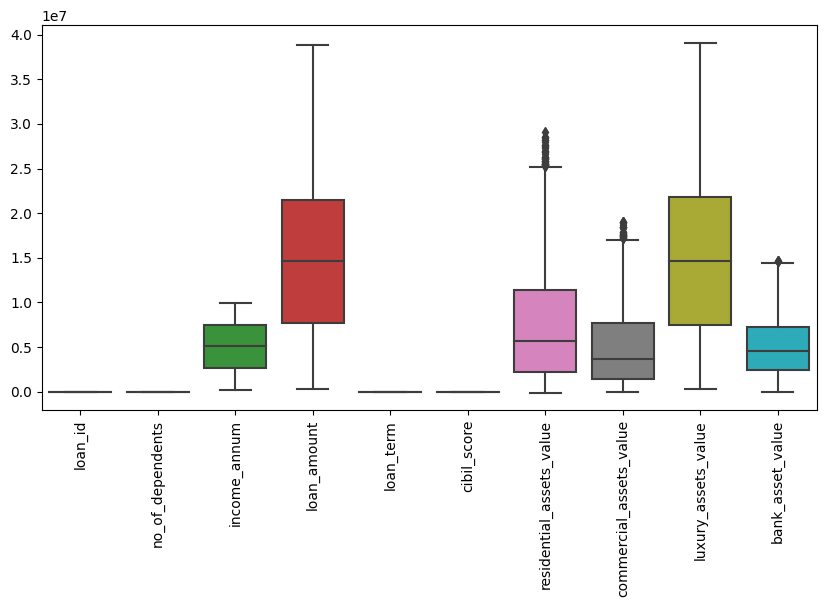

In [10]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data)

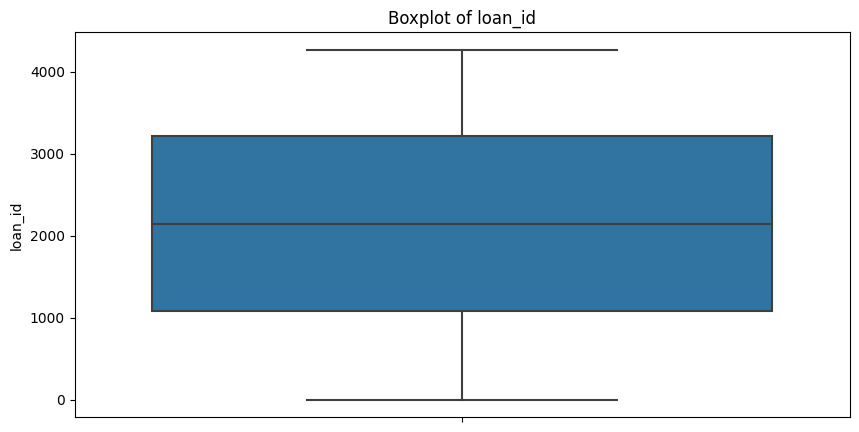

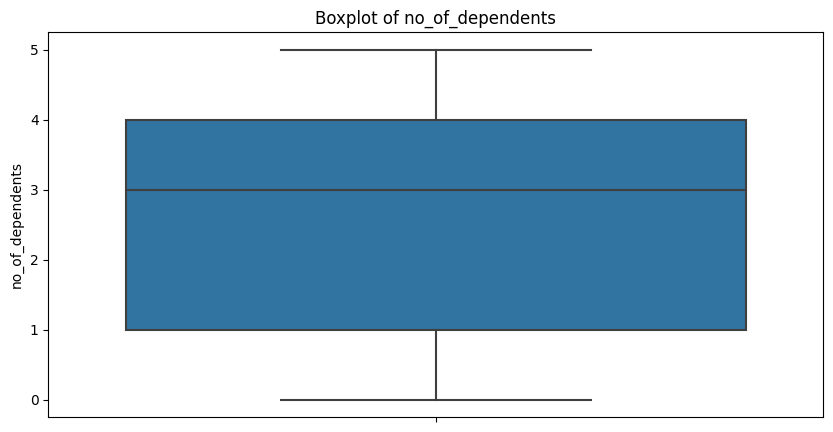

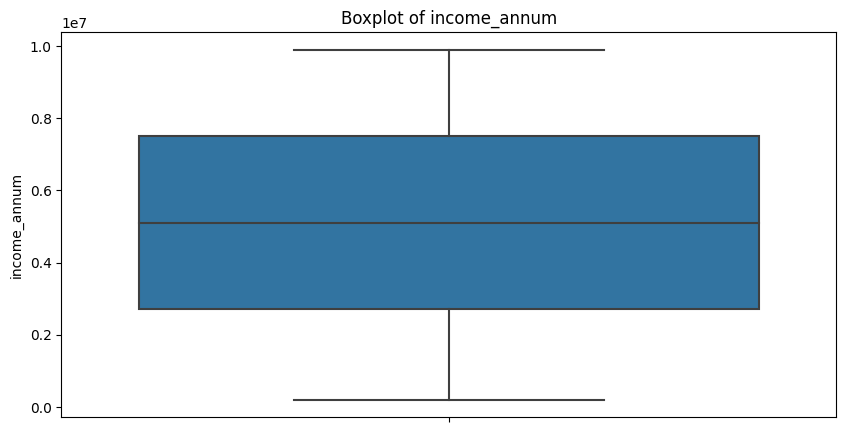

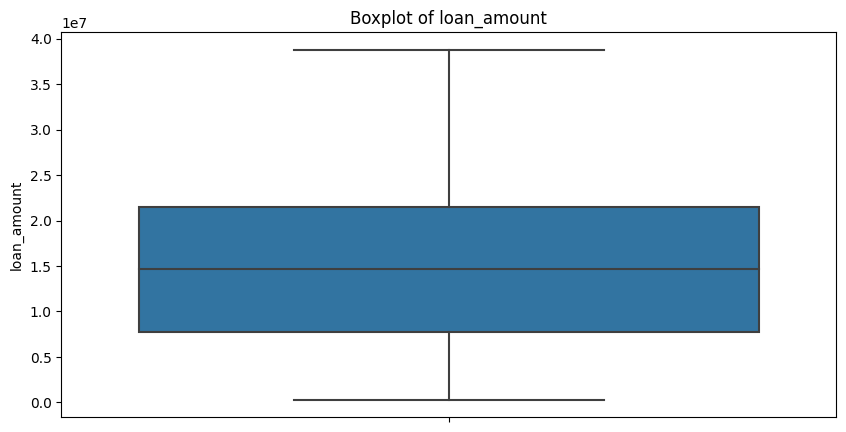

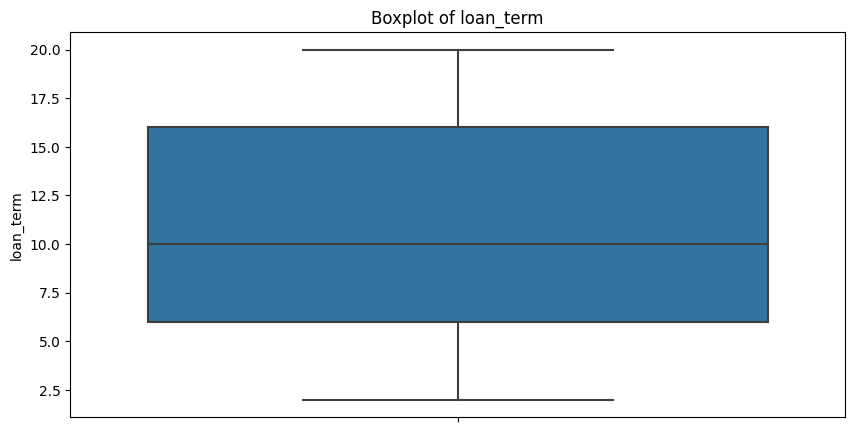

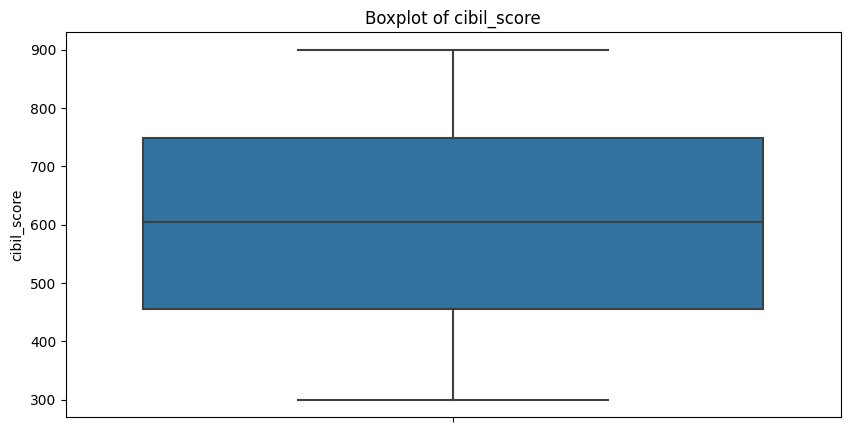

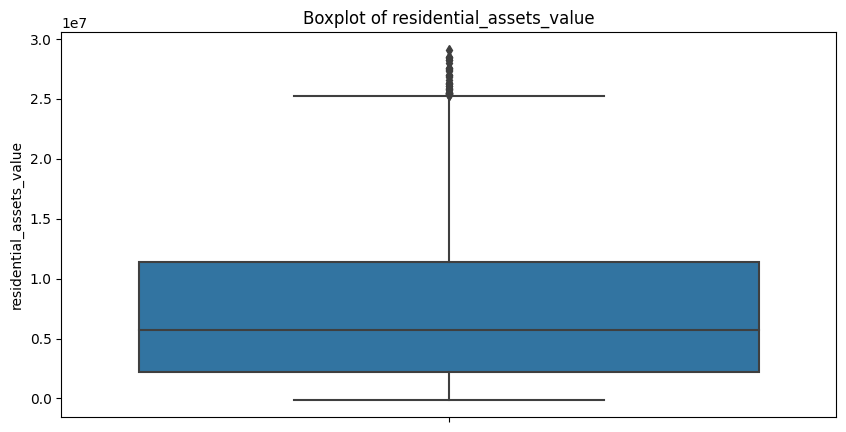

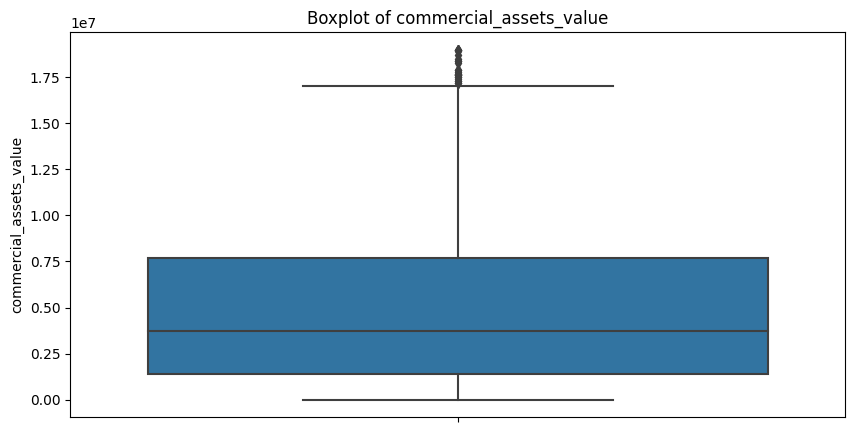

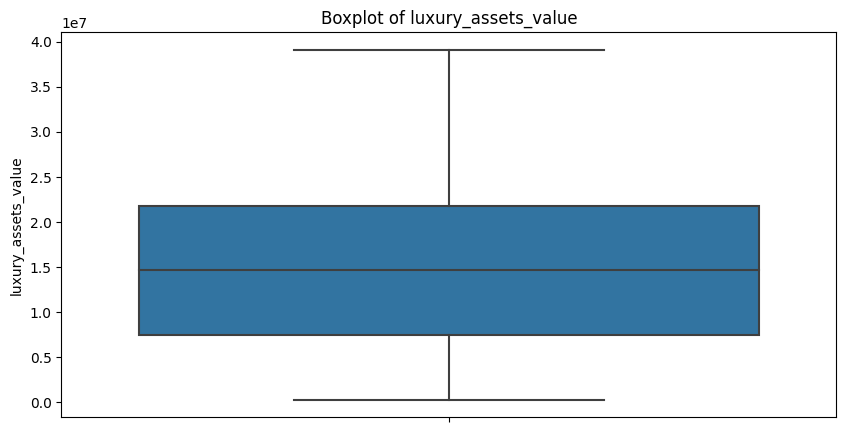

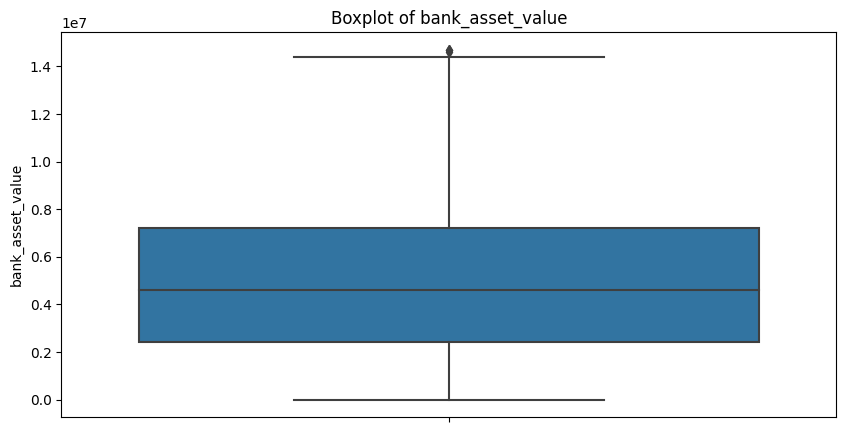

In [11]:
for column in data.columns:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()

## Handling Outliers
- We can handle ouliers using capping method

In [12]:
for column in ['residential_assets_value','commercial_assets_value','bank_asset_value']:
    if data[column].dtype!='object':
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower_range=q1-(IQR*1.5)
        upper_range=q3+(IQR*1.5)
        data[column]=np.where(data[column]<lower_range,lower_range,
                     np.where(data[column]>upper_range,upper_range,
                     data[column]))

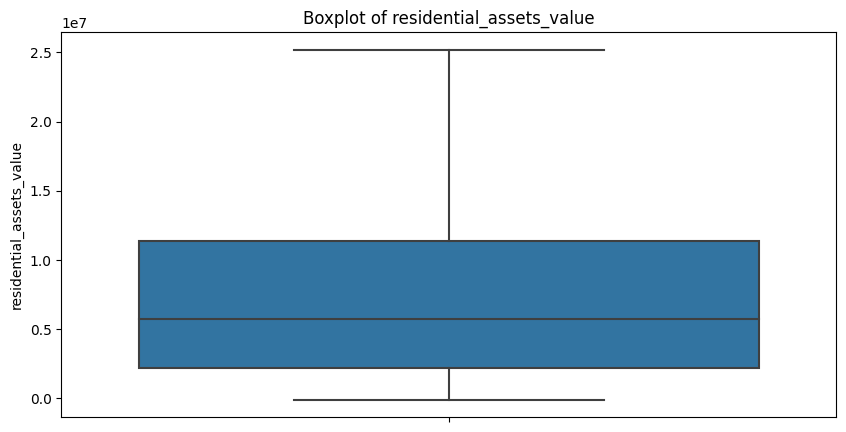

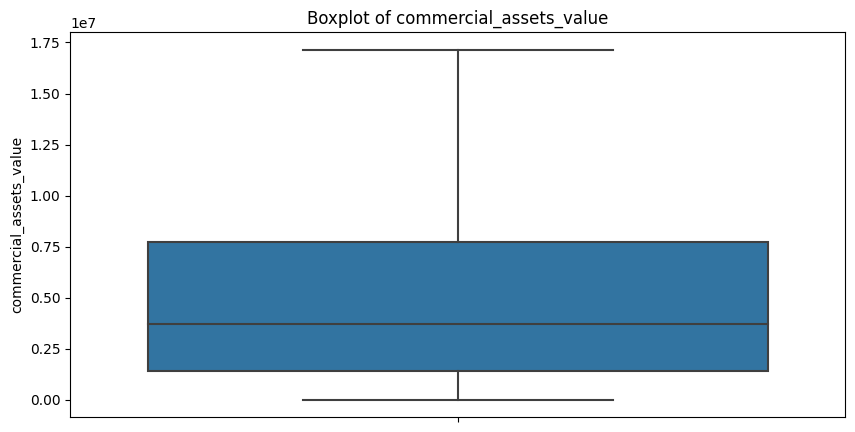

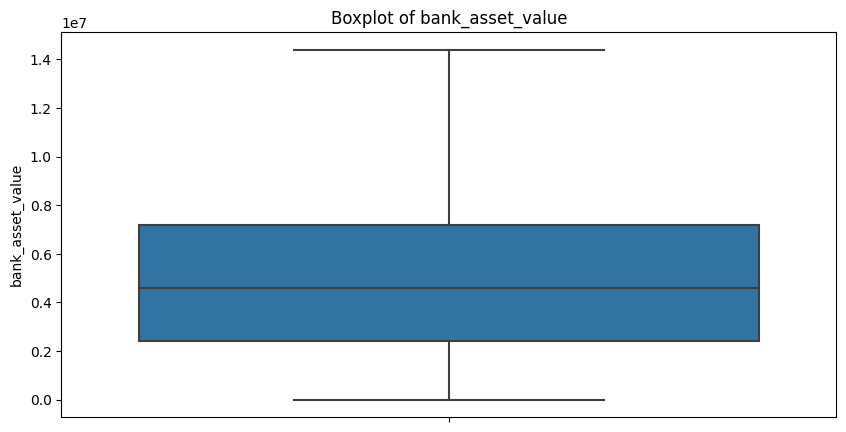

In [13]:
for column in ['residential_assets_value','commercial_assets_value','bank_asset_value']:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()

In [14]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03
mean,2139.129183,2.512718,5.069378e+06,1.521456e+07,10.938420,602.427376,7.509739e+06,4.980422e+06,1.518076e+07,5.015629e+06
std,1235.660195,1.689341,2.802102e+06,9.055057e+06,5.704727,171.985574,6.463909e+06,4.360298e+06,9.084297e+06,3.273624e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1082.750000,1.000000,2.700000e+06,7.700000e+06,6.000000,456.000000,2.200000e+06,1.400000e+06,7.500000e+06,2.400000e+06
50%,2141.500000,3.000000,5.100000e+06,1.470000e+07,10.000000,605.000000,5.700000e+06,3.700000e+06,1.470000e+07,4.600000e+06
75%,3210.250000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.250000,1.140000e+07,7.700000e+06,2.180000e+07,7.200000e+06
max,4269.000000,5.000000,9.900000e+06,3.880000e+07,20.000000,900.000000,2.520000e+07,1.715000e+07,3.910000e+07,1.440000e+07


## Getting answers for our questions using visulaization

1. What is the ratio between graduated and not graduated people requesting for loan ?

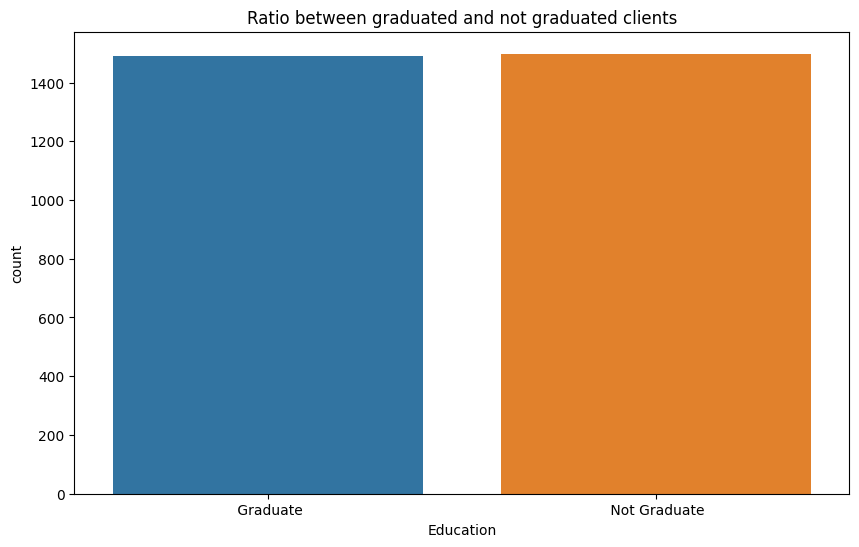

In [15]:
#ratio between graduated aand not graduated
plt.figure(figsize=(10,6))
sns.countplot(x=data['education'],data=data)
plt.xlabel('Education')
plt.title('Ratio between graduated and not graduated clients')
plt.show()

2. What is the distribution of self employed persons requesting for loan ?

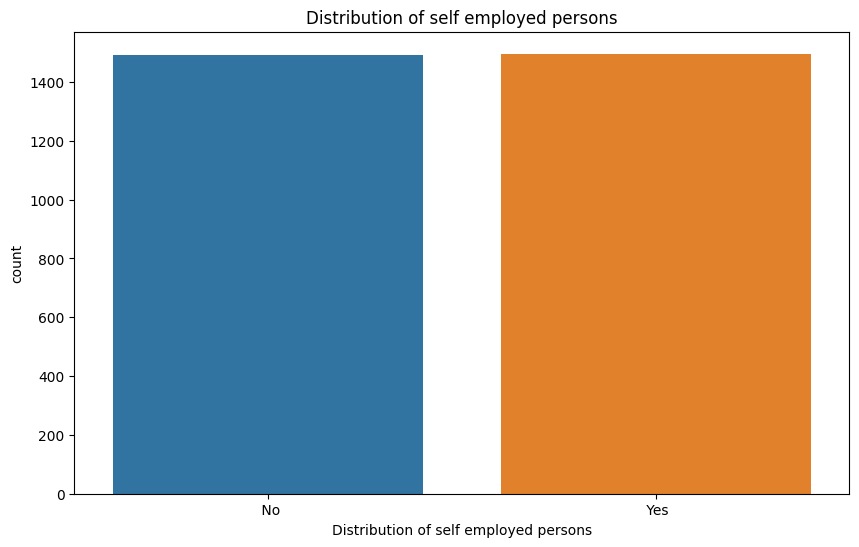

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['self_employed'],data=data)
plt.xlabel('Distribution of self employed persons')
plt.title('Distribution of self employed persons')
plt.show()

3. What is the loan amount provided based on loan term ?

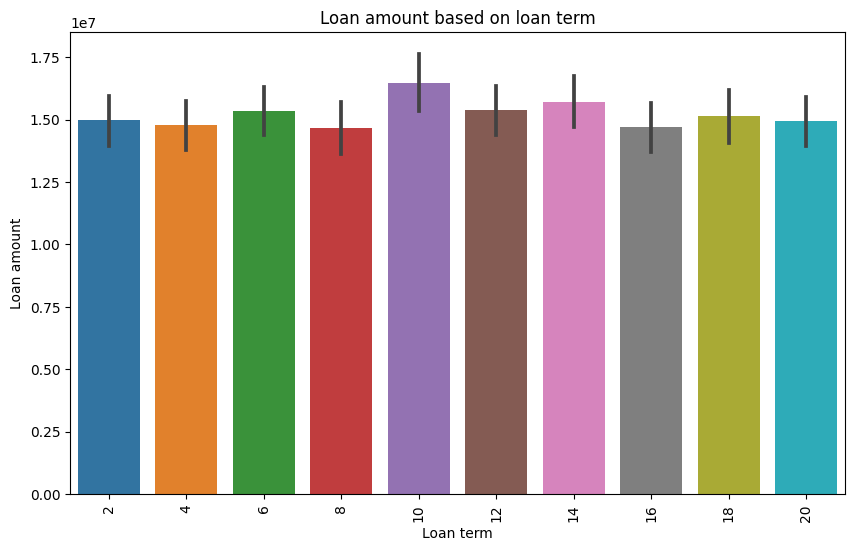

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['loan_term'],y=data['loan_amount'])
plt.xlabel('Loan term')
plt.xticks(rotation=90)
plt.ylabel('Loan amount')
plt.title('Loan amount based on loan term')
plt.show()

4. What is the loan amount provided based on number of dependents ?

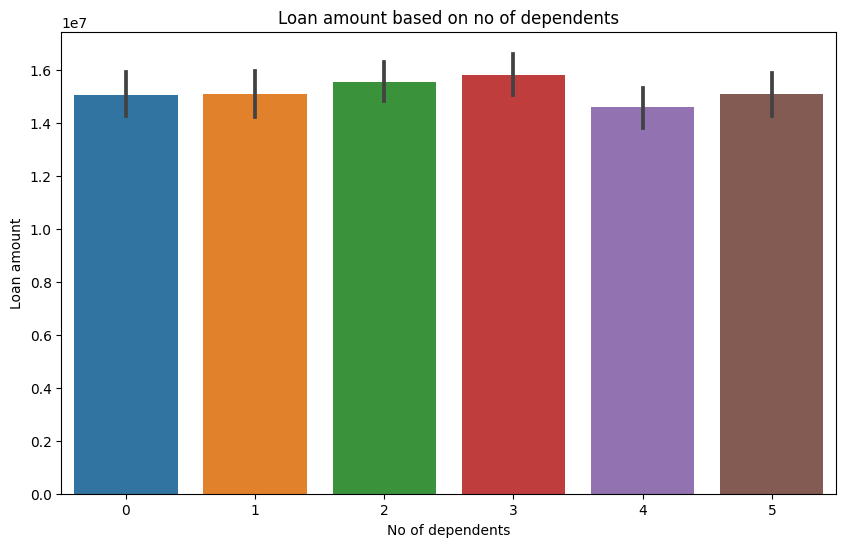

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['no_of_dependents'],y=data['loan_amount'])
plt.xlabel('No of dependents')
plt.ylabel('Loan amount')
plt.title('Loan amount based on no of dependents')
plt.show()

5. What is the loan status based on education ?

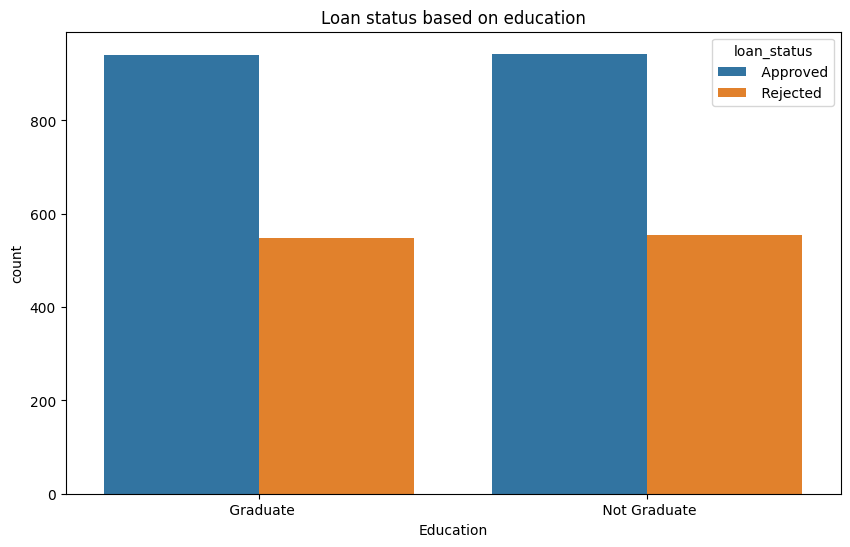

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['education'],hue=data['loan_status'])
plt.xlabel('Education')
plt.title('Loan status based on education')
plt.show()

6. What is the loan status based on self employed ?

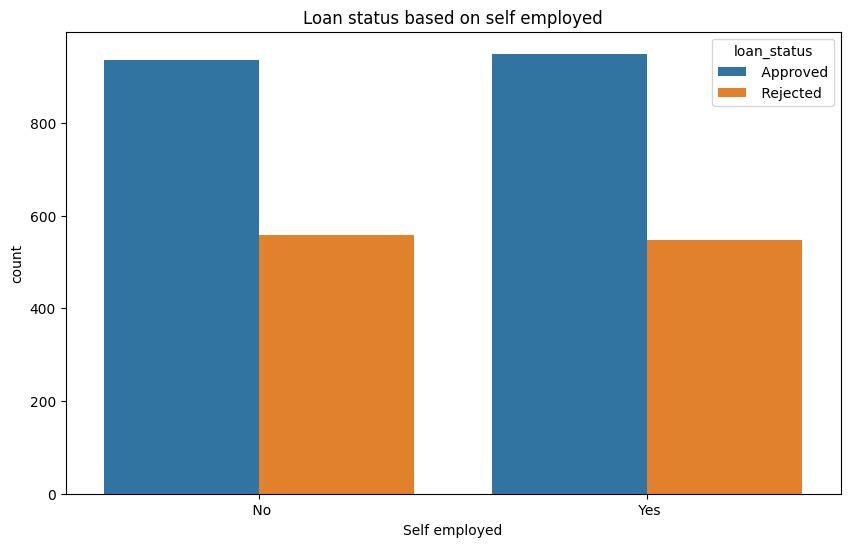

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['self_employed'],hue=data['loan_status'])
plt.xlabel('Self employed')
plt.title('Loan status based on self employed')
plt.show()

7. What is the distribution of assets ?

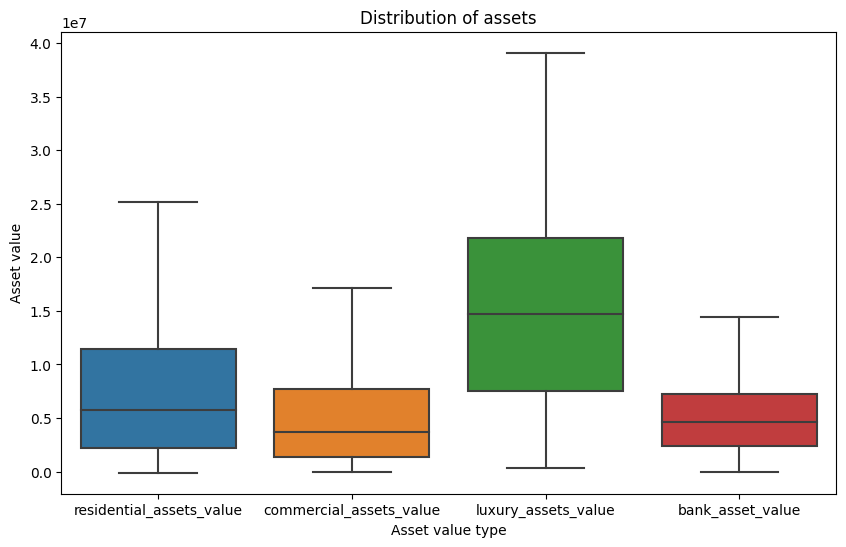

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']])
plt.xlabel('Asset value type')
plt.ylabel('Asset value')
plt.title('Distribution of assets')
plt.show()

8. What is the histogram of annual income ?

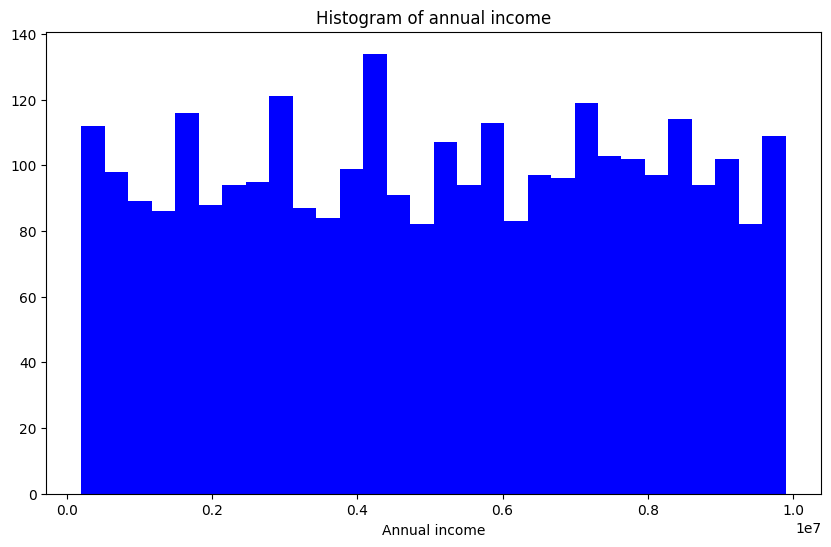

In [22]:
plt.figure(figsize=(10,6))
x=data['income_annum']
plt.hist(x,bins=30,color='blue')
plt.xlabel('Annual income')
plt.title('Histogram of annual income')
plt.show()

9. What is the histogram of loan amount ?

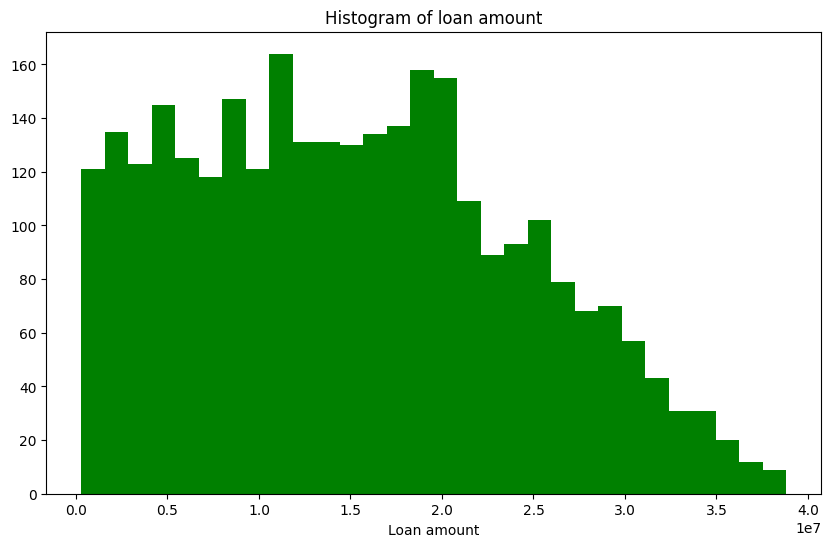

In [23]:
plt.figure(figsize=(10,6))
x=data['loan_amount']
plt.hist(x,bins=30,color='green')
plt.xlabel('Loan amount')
plt.title('Histogram of loan amount')
plt.show()